# Les technologies

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Présentation de Jupyter // Colab

Jupyter : mise en forme du texte **(Markdown)**

In [2]:
# Ou du code, avec le résultat qui s'affichera juste dessous
a = 3 + 3
print(a)

6


## Librairies de Machine Learning

### Numpy

In [3]:
import numpy as np

# Création de matrices
A = np.array([[1, -2, 3], [-4, 5, 6], [-7, 8, -9]])
B = np.array([10, 2, -3])

In [4]:
# Taille d'une matrice
A.shape

(3, 3)

In [5]:
# Calcul entre des matrices : NumPy vérifie que les tailles correspondent
# Ici : addition de matrices
C = A + B
print(C)

[[ 11   0   0]
 [  6   7   3]
 [  3  10 -12]]


In [6]:
# Addition d'un scalaire à toute une matrice
A + 2

array([[ 3,  0,  5],
       [-2,  7,  8],
       [-5, 10, -7]])

In [7]:
# Vectorisation : une fonction est appliquée à toute une matrice en une seule ligne
np.abs(A)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

### Pandas

In [8]:
import pandas as pd

# Chargement d'un fichier
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/iris.csv')

In [9]:
# Affichage des premières lignes
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
# Manipulation des colonnes / création de nouvelles colonnes (feature engineering)
df['sepal_length_inch'] = df['sepal_length'] / 2.54
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class,sepal_length_inch
0,5.1,3.5,1.4,0.2,Iris-setosa,2.007874
1,4.9,3.0,1.4,0.2,Iris-setosa,1.929134
2,4.7,3.2,1.3,0.2,Iris-setosa,1.850394
3,4.6,3.1,1.5,0.2,Iris-setosa,1.811024
4,5.0,3.6,1.4,0.2,Iris-setosa,1.968504


### Matplotlib

In [11]:
# Affichage des graphiques dans le notebook
%matplotlib inline

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

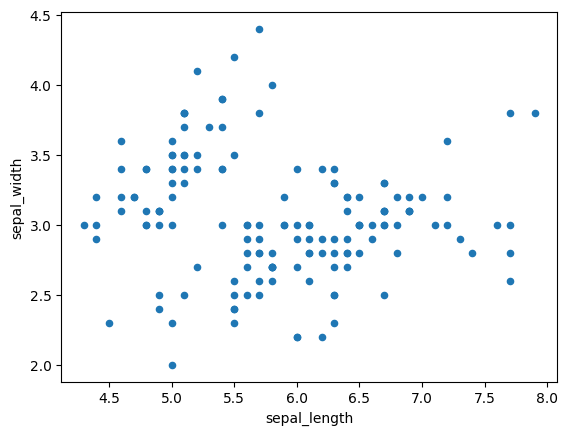

In [12]:
# Affichage du scatterplot directement via Pandas
df.plot.scatter(x='sepal_length', y='sepal_width')

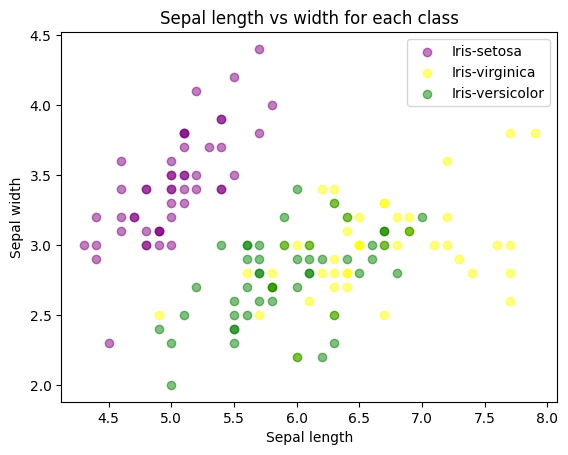

In [17]:
# Graphique plus complet avec matplotlib
#colors = {'Iris-setosa':'purple', 'Iris-virginica':'yellow', 'Iris-versicolor':'green'}
#df['color_class'] = df['class'].map(colors)

#plt.scatter(x=df['sepal_length'], y=df['sepal_width'], c=df['color_class'], alpha=0.5, label=df['class'])
#plt.xlabel('Sepal length')
#plt.ylabel('Sepal width')
#plt.title('Sepal length vs width for each class')

import matplotlib.pyplot as plt

colors = {'Iris-setosa':'purple', 'Iris-virginica':'yellow', 'Iris-versicolor':'green'}

for iris_class, color in colors.items():
    subset = df[df['class'] == iris_class]
    plt.scatter(x=subset['sepal_length'], y=subset['sepal_width'],
                color=color, alpha=0.5, label=iris_class)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sepal length vs width for each class')
plt.legend()
plt.show()


Text(0.5, 1.0, 'Sepal length vs width for each class')

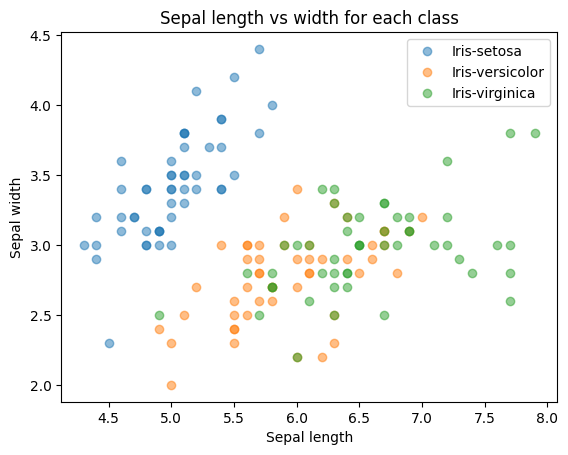

In [18]:
# Ajout d'une légende

# Création du dataset à partir du DataFrame
df2 = pd.DataFrame(dict(x=df['sepal_length'], y=df['sepal_width'], label=df['class']))
groups = df2.groupby('label')

# Affichage de chaque classe
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', label=name, alpha=0.5)

# Ajout des décorations
ax.legend()
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sepal length vs width for each class')